In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU usage

import evoten
from io import StringIO
from Bio import SeqIO
import numpy as np

evoten.set_backend("tensorflow")

2026-02-03 15:38:20.317656: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
newick = "(((((T2:0.2095121072,(T12:0.0112584323,(T19:0.2903414625,T39:0.0928483282):0.0290383442):0.0103254974):0.0489756282,((T10:0.0095400074,((T26:0.0124102676,T33:0.0075265397):0.2111319851,T28:0.1055948082):0.1795674280):0.1449839073,T23:0.0165662251):0.1305141993):0.1309507138,(((T4:0.0137261958,T44:0.0013910000):0.1381745495,(T6:0.1086117125,T13:0.0117863390):0.1753246902):0.0714787755,((T5:0.1126599655,T15:0.0191587193):0.0116744240,(T14:0.0489667627,(((T17:0.0345341891,(T40:0.2568889725,T41:0.0719594821):0.0124659657):0.1513681309,(T32:0.0647759334,(T38:0.1843911807,T42:0.0138583074):0.4697936562):0.0297702203):0.0216903640,((T18:0.0851250005,((T22:0.3547388261,T50:0.0937676545):0.0028317720,T36:0.2323684976):0.0853984318):0.0805225483,((T21:0.2710870915,T49:0.0532132922):0.0217948995,(T29:0.2578839931,T35:0.1961187047):0.0334431039):0.1749438206):0.3314850520):0.1154254283):0.4267871414):0.0543569119):0.0678423709):0.1288250224,((T3:0.1375160872,((T8:0.0642167883,T16:0.0953228065):0.0904667009,((T9:0.1742247586,(T20:0.0032625298,T47:0.0149225636):0.1242566922):0.4565618410,((T11:0.3193512848,T34:0.0318935066):0.0088281282,(((((T24:0.0734826615,T46:0.0033729529):0.0228348686,T31:0.2055196834):0.0989852132,(T30:0.0916718716,T45:0.1227295886):0.0313896569):0.0968772930,T27:0.0969789963):0.0187908884,T25:0.0163354037):0.2466706124):0.0948299347):0.0205910046):0.0595434796):0.0220819110,T7:0.1070666916):0.0096142354):0.0482238441,T1:0.2446689456,(T37:0.3128649153,(T43:0.0161535494,T48:0.0476202370):0.1227330906):0.3469109984);"
msa_file = "al_gen_n50.fa"
alphabet = "ACGT"

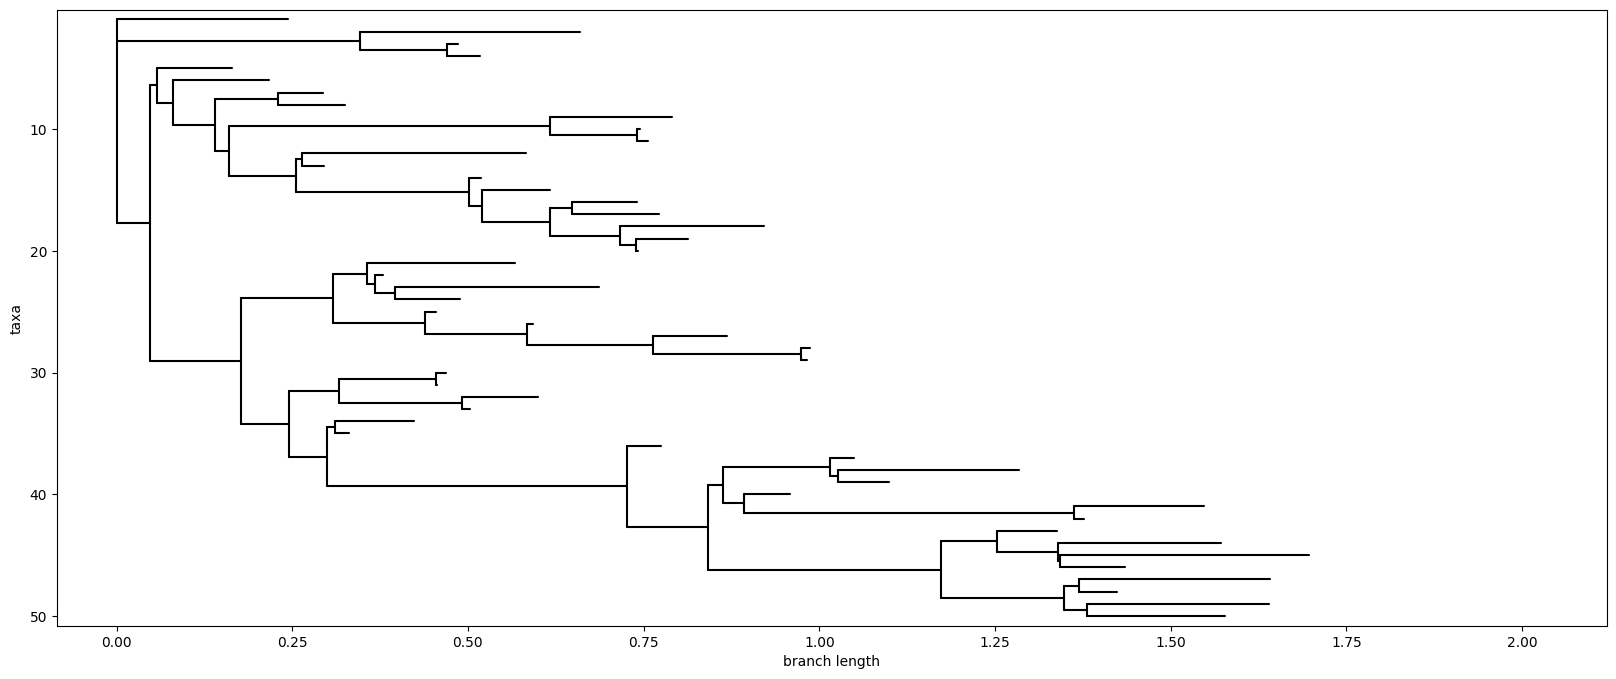

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xlim(-0.5, 10.0)  # Adjust these values to zoom in/out
ax.set_ylim(-5, 55)     # Adjust these values to zoom in/out

handle = StringIO(newick)
tree = evoten.TreeHandler.read(handle)
tree.draw(no_labels=True, axes=ax)
plt.show()

In [4]:
tree.height

12

In [5]:
tree.layer_sizes[1:].sum()

np.int64(48)

In [6]:
leaf_names = []
seqs = []
for record in SeqIO.parse(msa_file, "fasta"):
    leaf_names.append(record.id)
    seqs.append(str(record.seq))

one_hot_leaves = evoten.util.encode_one_hot(seqs, alphabet=alphabet)
one_hot_leaves = one_hot_leaves[:, np.newaxis] 
print(np.shape(one_hot_leaves))
# use only the last two msa-columns for readability
one_hot_leaves_red_problem_col = one_hot_leaves[:,:,[-1,-2]]
one_hot_leaves_red_problem_col.shape


(50, 1, 1000, 4)


(50, 1, 2, 4)

In [7]:
leaf_names

['T2',
 'T16',
 'T44',
 'T27',
 'T3',
 'T36',
 'T40',
 'T47',
 'T26',
 'T23',
 'T5',
 'T49',
 'T30',
 'T21',
 'T13',
 'T4',
 'T38',
 'T48',
 'T50',
 'T29',
 'T14',
 'T39',
 'T37',
 'T12',
 'T17',
 'T33',
 'T7',
 'T6',
 'T41',
 'T32',
 'T18',
 'T34',
 'T46',
 'T45',
 'T42',
 'T24',
 'T10',
 'T20',
 'T31',
 'T35',
 'T19',
 'T43',
 'T22',
 'T8',
 'T9',
 'T25',
 'T15',
 'T1',
 'T11',
 'T28']

In [8]:
rate_matrix = np.array([[[-1, 1./3, 1./3, 1./3],
                         [1./3, -1, 1./3, 1./3],
                         [1./3, 1./3, -1, 1./3],
                         [1./3, 1./3, 1./3, -1]]])
equilibrium = [[1./4, 1./4, 1./4, 1./4]]

rate_matrix = rate_matrix.astype(evoten.util.default_dtype)

transition_probs = evoten.backend.make_transition_probs(
    rate_matrix,
    tree.branch_lengths,
    equilibrium
)
transition_probs = transition_probs[:,:,np.newaxis]

2026-02-03 15:38:22.278293: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2026-02-03 15:38:22.278321: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2026-02-03 15:38:22.278326: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2026-02-03 15:38:22.278330: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2026-02-03 15:38:22.278333: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: powergreif
2026-02-03 15:38:22.278336: I external/local_xla/xla/stream_executor/cuda/cu

In [9]:
transition_probs.shape

TensorShape([97, 1, 1, 4, 4])

In [10]:
M = evoten.model.compute_ancestral_marginals(
    one_hot_leaves_red_problem_col[:, :, :1],  # use only one of the two problem columns
    tree,
    transition_probs,
    equilibrium_logits=np.log(equilibrium),
    leaf_names=leaf_names,
    leaves_are_probabilities=True,
    return_probabilities= True
)

In [11]:
evoten.model.loglik(
    one_hot_leaves_red_problem_col,
    tree,
    transition_probs,
    equilibrium_logits=np.log(equilibrium),
    leaf_names=leaf_names,
    leaves_are_probabilities=True,
)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-102.00462,  -80.34166]], dtype=float32)>

In [12]:
one_hot_leaves_red_problem_col[:, :, 0].sum(0)

array([[22., 10., 12.,  6.]], dtype=float32)

In [13]:
one_hot_leaves_red_problem_col[:, :, 1].sum(0)

array([[31.,  4., 11.,  4.]], dtype=float32)

In [14]:
print(np.argwhere(M[0][0] > 1))
M[0,0,0]

[]


<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([9.9969488e-01, 3.8336893e-05, 2.2767913e-04, 3.9298760e-05],
      dtype=float32)>

In [15]:
M[-2]

<tf.Tensor: shape=(1, 1, 4), dtype=float32, numpy=array([[[0.95024   , 0.00223387, 0.0336853 , 0.01384025]]], dtype=float32)>